In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("adult.data", header = None)

In [3]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
pd.read_table("adult.names")

In [4]:
df.shape

(32561, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
0     32561 non-null int64
1     32561 non-null object
2     32561 non-null int64
3     32561 non-null object
4     32561 non-null int64
5     32561 non-null object
6     32561 non-null object
7     32561 non-null object
8     32561 non-null object
9     32561 non-null object
10    32561 non-null int64
11    32561 non-null int64
12    32561 non-null int64
13    32561 non-null object
14    32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [6]:
df  = df.rename(columns = {0:'Age',1:'workclass',2:'fnlwgt',3:'education',4:'educationnum',5:'maritalstatus',6:'occupation',
                     7:'relationship',8:'race',9:'sex',10:'capitalgain',11:'capitalloss',12:'hoursperweek'
                     ,13:'nativecountry',14:"salarystatus"})

In [7]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [8]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [9]:
df = df.replace(' ?',np.nan)

In [10]:
df.isna().sum().sum()

4262

In [11]:
df.isna().sum()

Age                 0
workclass        1836
fnlwgt              0
education           0
educationnum        0
maritalstatus       0
occupation       1843
relationship        0
race                0
sex                 0
capitalgain         0
capitalloss         0
hoursperweek        0
nativecountry     583
salarystatus        0
dtype: int64

In [12]:
df = df.dropna()

In [13]:
df.isna().sum()

Age              0
workclass        0
fnlwgt           0
education        0
educationnum     0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
nativecountry    0
salarystatus     0
dtype: int64

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30162 entries, 0 to 32560
Data columns (total 15 columns):
Age              30162 non-null int64
workclass        30162 non-null object
fnlwgt           30162 non-null int64
education        30162 non-null object
educationnum     30162 non-null int64
maritalstatus    30162 non-null object
occupation       30162 non-null object
relationship     30162 non-null object
race             30162 non-null object
sex              30162 non-null object
capitalgain      30162 non-null int64
capitalloss      30162 non-null int64
hoursperweek     30162 non-null int64
nativecountry    30162 non-null object
salarystatus     30162 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [15]:
obj = df.dtypes[df.dtypes==object].index

In [16]:
for col in obj :
    df = df.join(pd.get_dummies(df[col], prefix=col, drop_first=True))

In [17]:
df.head()

,Age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,...,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia,salarystatus_ >50K
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,0,0,0,0,0,0,1,0,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,0,0,0,0,0,1,0,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0,0,0,0,0,0,1,0,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0,0,0,0,0,0,1,0,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0,0,0,0,0,0,0,0,0,0


In [19]:
df1 = df.drop(obj,axis=1) 

In [97]:
df1.head()

,Age,fnlwgt,educationnum,capitalgain,capitalloss,hoursperweek,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,nativecountry_ Puerto-Rico,nativecountry_ Scotland,nativecountry_ South,nativecountry_ Taiwan,nativecountry_ Thailand,nativecountry_ Trinadad&Tobago,nativecountry_ United-States,nativecountry_ Vietnam,nativecountry_ Yugoslavia,salarystatus_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
1,50,83311,13,0,0,13,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
2,38,215646,9,0,0,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,53,234721,7,0,0,40,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


<h3>Predict over 50K

In [20]:
x = df1.iloc[:,0:-1]
y = df1.iloc[:,-1]

In [ ]:
y

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size = 0.3, random_state = 0)

In [59]:
from sklearn.ensemble import RandomForestClassifier
rdfst = RandomForestClassifier(n_estimators=180)
rdfst.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=180, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [60]:
y_pred = rdfst.predict(x_test)

In [52]:
y_pred

array([0, 0, 0, ..., 1, 0, 0], dtype=uint8)

In [61]:
(y_pred !=y_test).sum()

1409

<h3>2)Important Factors

In [62]:
important_feature = pd.DataFrame.from_dict({'cols':x_train.columns,'importance':rdfst.feature_importances_})
important_feature = important_feature.sort_values(by='importance', ascending=False)
important_feature

,cols,importance
1,fnlwgt,0.160375
0,Age,0.157542
3,capitalgain,0.095457
28,maritalstatus_ Married-civ-spouse,0.087823
5,hoursperweek,0.085319
2,educationnum,0.062642
4,capitalloss,0.030685
30,maritalstatus_ Never-married,0.028229
35,occupation_ Exec-managerial,0.020014
55,sex_ Male,0.017983


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95]),
 <a list of 96 Text xticklabel objects>)

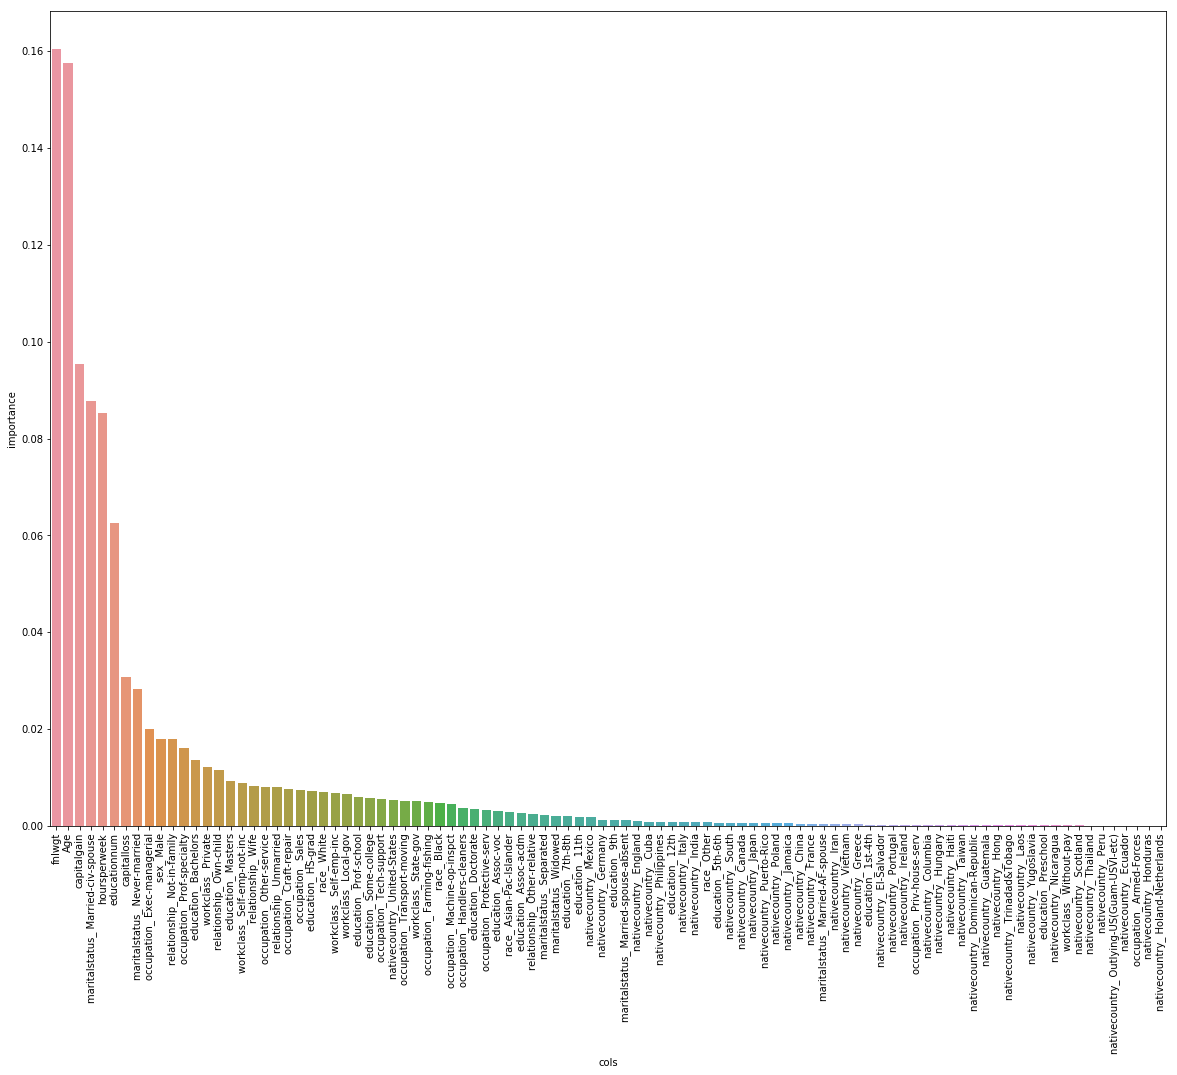

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,15))
sns.barplot(important_feature.cols, important_feature.importance)
plt.xticks(rotation=90)

In [72]:
imp_cols = important_feature[important_feature.importance >= 0.01].cols.values
imp_cols

array(['fnlwgt', 'Age', 'capitalgain',
       'maritalstatus_ Married-civ-spouse', 'hoursperweek',
       'educationnum', 'capitalloss', 'maritalstatus_ Never-married',
       'occupation_ Exec-managerial', 'sex_ Male',
       'relationship_ Not-in-family', 'occupation_ Prof-specialty',
       'education_ Bachelors', 'workclass_ Private',
       'relationship_ Own-child'], dtype=object)

<H3>Best Algorithm

In [31]:
from sklearn import metrics
cm = metrics.confusion_matrix(y_pred,y_test)
cm

array([[6240,  893],
       [ 524, 1392]], dtype=int64)

In [58]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier,AdaBoostClassifier

In [75]:
names = ["Decision Tree", "Random Forest", "AdaBoost", "Logisic", "GBM"]

In [76]:
classifiers = [
    DecisionTreeClassifier(max_depth=12),
    RandomForestClassifier(n_estimators=200, max_depth=12),
    AdaBoostClassifier(n_estimators=100),
    LogisticRegression(),
    GradientBoostingClassifier(n_estimators=100)]

In [77]:
list(zip(names, classifiers))

[('Decision Tree',
  DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, presort=False, random_state=None,
              splitter='best')),
 ('Random Forest',
  RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
              max_depth=12, max_features='auto', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=None,
              oob_score=False, random_state=None, verbose=0,
              warm_start=False)),
 ('AdaBoost', AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
            learning_rate=1.0, n_estimators=100, random_state=None)),
 ('Logisic',
  L

In [78]:
for clf in zip(names, classifiers):
    clf[1].fit(x_train, y_train) #[imp_cols]
    pred_train_y = clf[1].predict(x_train)
    pred_y = clf[1].predict(x_test)
    print(clf[0], metrics.accuracy_score(pred_train_y, y_train), metrics.precision_score(pred_train_y, y_train)) #[imp_cols]
    print(clf[0], metrics.accuracy_score(pred_y, y_test), metrics.precision_score(pred_y, y_test)) #[imp_cols]

Decision Tree 0.8844787571638327 0.6616886846639862
Decision Tree 0.8450657531218919 0.5886214442013129
Random Forest 0.8695590394543646 0.5803178250047866
Random Forest 0.8505912255497845 0.5518599562363239
AdaBoost 0.8650120778667172 0.6310549492628758
AdaBoost 0.8572217924632556 0.6166301969365426
Logisic 0.7938710746933169 0.2730231667623971
Logisic 0.7840645375179578 0.25339168490153174


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GBM 0.8671908302941316 0.6178441508711469
GBM 0.8591004530887391 0.6109409190371992


In [80]:
from sklearn.metrics import classification_report, confusion_matrix

In [81]:
for clf in zip(names, classifiers):
    print(clf[0])
    pred = clf[1].predict(x_test)
    print(confusion_matrix(pred, y_test))
    print(classification_report(pred, y_test)) # [imp_cols]
    print('*'*20)

Decision Tree
[[6302  940]
 [ 462 1345]]
              precision    recall  f1-score   support

           0       0.93      0.87      0.90      7242
           1       0.59      0.74      0.66      1807

   micro avg       0.85      0.85      0.85      9049
   macro avg       0.76      0.81      0.78      9049
weighted avg       0.86      0.85      0.85      9049

********************
Random Forest
[[6436 1024]
 [ 328 1261]]
              precision    recall  f1-score   support

           0       0.95      0.86      0.90      7460
           1       0.55      0.79      0.65      1589

   micro avg       0.85      0.85      0.85      9049
   macro avg       0.75      0.83      0.78      9049
weighted avg       0.88      0.85      0.86      9049

********************
AdaBoost
[[6348  876]
 [ 416 1409]]
              precision    recall  f1-score   support

           0       0.94      0.88      0.91      7224
           1       0.62      0.77      0.69      1825

   micro avg       0.8

Based on above accuracy and precision score we select GBM